In [237]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import wandb
import os

# Plot Wikipedia Dataset

In [238]:
run = wandb.init(job_type="evaluation", project="wiki-workload")
pageview_dir = run.use_artifact('pageviews:latest').download()
questions_dir = run.use_artifact('questions:latest').download()

wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [239]:
pageview_df = pd.read_csv(f"{pageview_dir}/pageviews.csv")
pageview_df

,Unnamed: 0,title,edit_count,2021080500,2021080600,2021080700,2021080800,2021080900,2021081000,2021081100,...,2021082800,2021082900,2021083000,2021083100,2021090100,2021090200,2021090300,2021090400,weights,doc_id
0,0,Deaths in 2021,1877,38,35,36,31,349,66,56,...,69,50,63,68,50,52,39,46,0.028511,65984422
1,1,2021 Atlantic hurricane season,1438,11,5,16,8,9,7,14,...,8,20,2,8,5,12,11,5,0.003805,57798785
2,2,Neeraj Chopra,1156,3,7,3,2,4,3,4,...,5,6,0,4,9,2,1,3,0.002170,51150040
3,3,Fall of Kabul (2021),1009,18,9,12,12,16,10,12,...,11,16,9,9,20,15,5,10,0.004876,68481047
4,4,Great Britain at the 2020 Summer Paralympics,989,13,5,6,4,16,8,9,...,3,8,6,8,10,7,4,7,0.003397,60043578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,List of fungi of South Africa,203,8,9,7,13,21,4,9,...,10,7,6,1,13,5,5,6,0.003467,68354495
212,212,Mister Supranational 2021,203,8,9,7,13,21,4,9,...,10,7,6,1,13,5,5,6,0.003467,67918135
213,213,2021–22 FC Barcelona season,202,19,29,29,27,28,27,23,...,21,26,29,16,27,20,43,18,0.012698,67089631
214,214,Hamid Karzai International Airport,201,14,26,15,17,26,14,17,...,19,10,25,13,26,14,22,7,0.007258,487602


<AxesSubplot:>

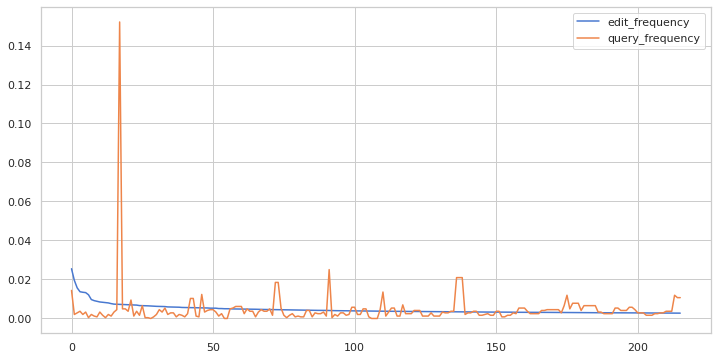

In [240]:
df = pd.DataFrame({
    "edit_frequency": pageview_df.edit_count / pageview_df.edit_count.sum(),
    "query_frequency": pageview_df["2021080600"] / pageview_df["2021080600"].sum()
})

df.plot()

# Plot DPR Model Accuracy Results 

In [241]:
run = wandb.init(job_type="evaluation", project="wiki-workload")
artifact = run.use_artifact('prediction_results:latest')
artifact_dir = artifact.download()

wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [242]:
artifact_dir

'./artifacts/prediction_results:v1'

In [289]:
artifact_dir = "/home/eecs/wooders/DPR"

In [290]:
constants = [0.01, 0.05, 0.1, 1, 5]
policies = ["lifo"]
key_policies = ["random", "weighted_random"]
d = artifact_dir
metric = 'top5'

In [291]:
all_results = {}
for policy in policies: 
    for key_policy in key_policies: 
        scores = []
        name = f"plan-{key_policy}_{policy}-always_process"
        for constant in constants: 
            print(f'{d}/{name}-{constant}-100.json')
            with open(f'{d}/{name}-{constant}-100.json') as results_file:
                results = json.load(results_file)
                scores.append(results[metric])
        all_results[name] = scores
all_results

/home/eecs/wooders/DPR/plan-random_lifo-always_process-0.01-100.json
/home/eecs/wooders/DPR/plan-random_lifo-always_process-0.05-100.json
/home/eecs/wooders/DPR/plan-random_lifo-always_process-0.1-100.json
/home/eecs/wooders/DPR/plan-random_lifo-always_process-1-100.json
/home/eecs/wooders/DPR/plan-random_lifo-always_process-5-100.json
/home/eecs/wooders/DPR/plan-weighted_random_lifo-always_process-0.01-100.json
/home/eecs/wooders/DPR/plan-weighted_random_lifo-always_process-0.05-100.json
/home/eecs/wooders/DPR/plan-weighted_random_lifo-always_process-0.1-100.json
/home/eecs/wooders/DPR/plan-weighted_random_lifo-always_process-1-100.json
/home/eecs/wooders/DPR/plan-weighted_random_lifo-always_process-5-100.json


{'plan-random_lifo-always_process': [0.41722204591135087,
  0.41605839416058393,
  0.3628477731936951,
  0.19216121866074262,
  0.20681265206812652],
 'plan-weighted_random_lifo-always_process': [0.4166931132973659,
  0.4052681688352904,
  0.3899820162911245,
  0.256373637998519,
  0.17237913889770443]}

In [228]:
all_results = {}
for policy in policies: 
    for key_policy in key_policies: 
        scores = []
        name = f"plan-{key_policy}_{policy}-always_process"
        for constant in constants: 
            with open(f'{d}/{name}-{constant}-100.json') as results_file:
                results = json.load(results_file)
                scores.append(results[metric])
        all_results[name] = scores
all_results

{'plan-weighted_round_robin_lifo-always_process': [0.7134603189515466,
  0.14824122570088702,
  0.13923792971165966,
  0.14143003656121067,
  0.1144984381238697,
  0.12701693402541278],
 'plan-weighted_random_lifo-always_process': [0.7100077506635037,
  0.1506368853293249,
  0.15045681940954037,
  0.13972332479977453,
  0.11063093532501898,
  0.12261706242024253],
 'plan-random_lifo-always_process': [0.699352545584079,
  0.14759142259905583,
  0.15119274099474678,
  0.12415936616796236,
  0.11849120417126617,
  0.11131988319202073],
 'plan-round_robin_lifo-always_process': [0.6862547071580117,
  0.14121082587625558,
  0.14572030282390336,
  0.12318857599173262,
  0.11423225372070993,
  0.11082665915087175]}

In [229]:
all_results.keys()

dict_keys(['plan-weighted_round_robin_lifo-always_process', 'plan-weighted_random_lifo-always_process', 'plan-random_lifo-always_process', 'plan-round_robin_lifo-always_process'])

In [230]:
plan_weighted_random_lifo = []
for constant in constants:
    with open(f'{d}/plan-weighted_random_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_weighted_random_lifo.append(results[metric])
print(plan_weighted_random_lifo)
        
plan_weighted_longest_queue_lifo = []
for constant in constants:
    with open(f'{d}/plan-weighted_longest_queue_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_weighted_longest_queue_lifo.append(results[metric])
print(plan_weighted_longest_queue_lifo)

plan_longest_queue_lifo = []
for constant in constants:
    with open(f'{d}/plan-longest_queue_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_longest_queue_lifo.append(results[metric])
print(plan_longest_queue_lifo)

plan_random_lifo = []
for constant in constants:
    with open(f'{d}/plan-random_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_random_lifo.append(results[metric])
print(plan_random_lifo)

plan_round_robin_lifo = []
for constant in constants:
    with open(f'{d}/plan-round_robin_lifo-always_process-{constant}-100.json') as results_file:
        results = json.load(results_file)
        plan_round_robin_lifo.append(results[metric])
print(plan_round_robin_lifo)


[0.7100077506635037, 0.1506368853293249, 0.15045681940954037, 0.13972332479977453, 0.11063093532501898, 0.12261706242024253]
[0.11061527741895076, 0.11378600339776562, 0.11060744846591665, 0.11156258073607817, 0.11068573799625776, 0.11357462166584463]
[0.11424008267374404, 0.11315185820200264, 0.127032591931481, 0.11396606931755017, 0.11010639547173356, 0.11089711972817876]
[0.699352545584079, 0.14759142259905583, 0.15119274099474678, 0.12415936616796236, 0.11849120417126617, 0.11131988319202073]
[0.6862547071580117, 0.14121082587625558, 0.14572030282390336, 0.12318857599173262, 0.11423225372070993, 0.11082665915087175]


In [231]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

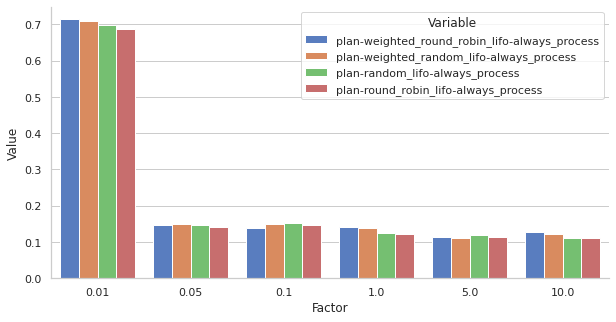

In [232]:
import matplotlib.pyplot as plt
import seaborn
resources = constants 
df = pd.DataFrame({
    'Factor': resources, 
    **all_results
})
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = df.melt(id_vars='Factor').rename(columns=str.title)
seaborn.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1)
seaborn.despine(fig)

[0.01, 0.05, 0.1, 1, 5, 10]


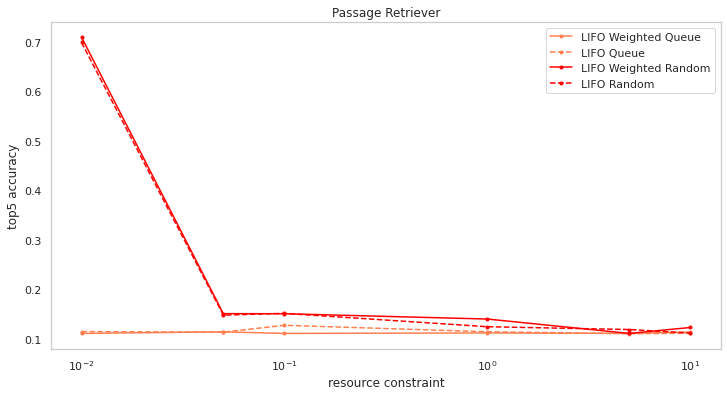

In [233]:
fig, ax = plt.subplots()
ax.set_xscale('log')
#resources = [10/c for c in constants]
resources = constants 
print(resources)
ax.plot(resources, plan_weighted_longest_queue_lifo, label="LIFO Weighted Queue", c='coral', marker='.')
ax.plot(resources, plan_longest_queue_lifo, label="LIFO Queue", c='coral', marker='.', linestyle='dashed')

ax.plot(resources, plan_weighted_random_lifo, label="LIFO Weighted Random", c='red', marker='.')
ax.plot(resources, plan_random_lifo, label="LIFO Random", c='red', marker='.', linestyle='dashed')

#ax.plot(resources, plan_lifo_sample_half, label="LIFO Sample Half", c='dodgerblue', marker='.', linestyle='dashed')
#ax.plot(resources, plan_lifo_always_process, label="LIFO Always", c='dodgerblue', marker='.')

#ax.plot(resources, plan_round_robin_lifo, label="LIFO Round Robin", c='blue', marker='.', linestyle='dashed')

ax.grid()
ax.set(xlabel='resource constraint', ylabel=f'{metric} accuracy', title='Passage Retriever')
plt.legend()

## Observe how often each key was updated 

In [10]:
plan_dir = '/data/wooders/wiki-plans'
diff_dir = '/data/wooders/wikipedia/diffs'

In [162]:
from collections import defaultdict 

def evaluate_plan(plan_file, optimal_file, start_ts=0, end_ts=37000): 
    plan = json.load(open(plan_file))
    optimal_plan = json.load(open(optimal_file))
    

    title_counts = defaultdict(lambda: 0)
    title_counts_opt = defaultdict(lambda: 0)

    for ts in plan.keys(): 
        if float(ts) < start_ts or float(ts) > end_ts: continue 
        for edit in plan[ts]: 
            edit_file = edit[0]
            edit_data = json.load(open(f"{diff_dir}/{edit_file}"))
            title = edit_data['title']
            title_counts[title] += 1
            
    for ts in optimal_plan.keys(): 
        if float(ts) < start_ts or float(ts) > end_ts: continue  
        for edit in optimal_plan[ts]: 
            edit_file = edit[0]
            edit_data = json.load(open(f"{diff_dir}/{edit_file}"))
            title = edit_data['title']
            title_counts_opt[title] += 1
            
    #assert title_counts_opt != title_counts
    
    title_counts_df = pd.DataFrame({"title": title_counts.keys(), "updates": title_counts.values()})
    title_counts_opt_df = pd.DataFrame({"title": title_counts_opt.keys(), "optimal_updates": title_counts_opt.values()})
    
    plan_data_df = title_counts_df.merge(pageview_df, on="title")
    plan_data_df = plan_data_df.merge(title_counts_opt_df, on="title")
    plan_data_df["pageviews"] = plan_data_df["2021090300"]
    return plan_data_df

In [153]:
plan_names = [
    'plan-round_robin_lifo-always_process-5-100',
    'plan-weighted_round_robin_lifo-always_process-5-100',
    'plan-random_lifo-always_process-5-100',
    'plan-weighted_random_lifo-always_process-5-100'   
]

In [154]:
results = {}
end_ts = 1000
for plan_name in plan_names:
    print(plan_name)
    plan_file = f'{plan_dir}/{plan_name}.json'
    plan_data_df = evaluate_plan(plan_file, f'/home/eecs/wooders/experiments/wikipedia/optimal_plan.json', end_ts=end_ts)
    results[plan_name] = plan_data_df
    

plan-round_robin_lifo-always_process-5-100
plan-weighted_round_robin_lifo-always_process-5-100
plan-random_lifo-always_process-5-100
plan-weighted_random_lifo-always_process-5-100


<AxesSubplot:title={'center':'Updates for Top Documents (Weighted Round Robin)'}, xlabel='title'>

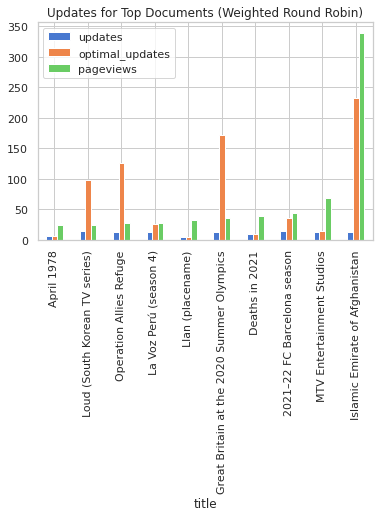

In [155]:
results['plan-round_robin_lifo-always_process-5-100'].set_index("title").sort_values(by="pageviews").tail(10)[["updates", "optimal_updates", "pageviews"]].plot(kind="bar", title="Updates for Top Documents (Weighted Round Robin)")

<AxesSubplot:title={'center':'Updates for Least Queried Documents (Round Robin)'}, xlabel='title'>

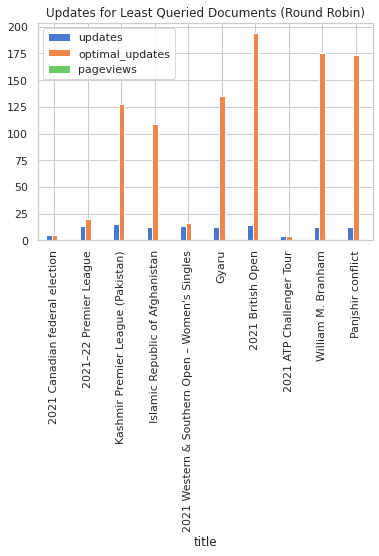

In [156]:
results['plan-round_robin_lifo-always_process-5-100'].set_index("title").sort_values(by="pageviews").head(10)[["updates", "optimal_updates", "pageviews"]].plot(kind="bar",  title="Updates for Least Queried Documents (Round Robin)")

<AxesSubplot:ylabel='Frequency'>

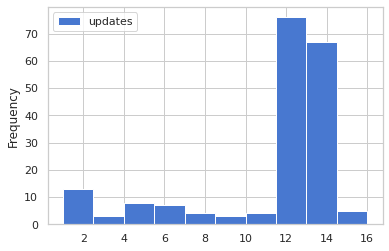

In [157]:
results['plan-round_robin_lifo-always_process-5-100'].plot(x="pageviews", y="updates", kind="hist")

<AxesSubplot:ylabel='Frequency'>

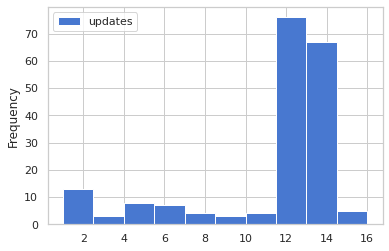

In [158]:
results['plan-round_robin_lifo-always_process-5-100'].plot(x="pageviews", y="updates", kind="hist")

<AxesSubplot:ylabel='Frequency'>

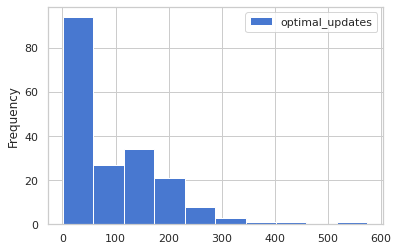

In [159]:
results['plan-round_robin_lifo-always_process-5-100'].plot(x="pageviews", y="optimal_updates", kind="hist")

In [163]:
optimal_plan_df = evaluate_plan(f'/home/eecs/wooders/experiments/wikipedia/optimal_plan.json', f'/home/eecs/wooders/experiments/wikipedia/optimal_plan.json', end_ts=end_ts)

In [208]:
n_fits = np.array(range(0, 250, 1)) #optimal_plan_df["updates"].unique()
n_fits.sort()
n_fits_map = {v: i for i, v in enumerate(n_fits)}
n_fits_ticks = {i: v for i, v in enumerate(n_fits)}

In [209]:
n_fits_map

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [195]:
import seaborn as sns
import numpy as np
sns.set(style="whitegrid", palette="muted")

In [200]:
max_fits = 60 

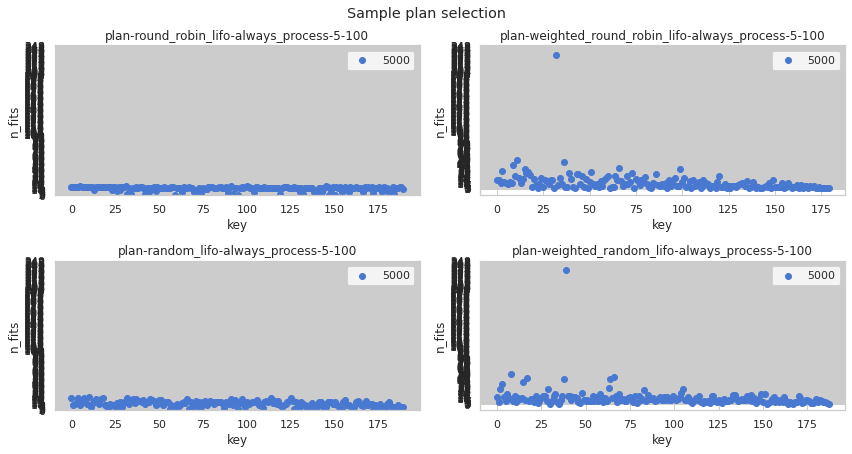

In [211]:
fig = plt.figure(figsize=(12, 12))
for i, plan_name in enumerate(results.keys()):
    plan_file = f'{plan_dir}/{plan_name}.json'
    plan_data_df = results[plan_name]
    plt.subplot(4, 2, i + 1)
    #plan, loss = run_lp(df, max_n_fits=max_n_fits)
    #arr = np.array([(key, n_fits_map[fits]) for (key, fits) in plan.items()])
    vals = plan_data_df["updates"].tolist()
    arr = np.array([(i, vals[i]) for i in range(len(vals))])
    plt.scatter(arr[:, 0], arr[:, 1], label=max_n_fits)
    plt.yticks(ticks=list(n_fits_ticks.keys()), labels=list(n_fits_ticks.values()))
    plt.xlabel("key")
    plt.ylabel("n_fits")
    plt.legend()
    plt.title(plan_name)
plt.suptitle("Sample plan selection")
plt.tight_layout()

In [318]:
df = pd.read_csv("/data/wooders/wikipedia/10042021_questions_revid_filtered.csv", sep="\t")
df.columns = ["question", "answer", "doc_id", "timestamp", "revid", "oldrevid"]

In [319]:
df

,question,answer,doc_id,timestamp,revid,oldrevid
0,what is the most common death in 2021???????,A typical entry reports information in the fol...,65984422,2021-08-06 00:16:27.428572,1037212532,1037212489
1,what is the most common death in 2021???????,A typical entry reports information in the fol...,65984422,2021-08-06 00:32:54.857144,1037212532,1037212489
2,what is the most common death in 2021???????,A typical entry reports information in the fol...,65984422,2021-08-06 00:49:22.285716,1037212532,1037212489
3,what is the most common death in 2021???????,A typical entry reports information in the fol...,65984422,2021-08-06 01:05:49.714288,1037212532,1037212489
4,what is the most common death in 2021???????,A typical entry reports information in the fol...,65984422,2021-08-06 01:22:17.142860,1037212532,1037212489
...,...,...,...,...,...,...
127727,who is the ayo??????,Hunter B-15 (portrayed by Wunmi Mosaku) is an ...,62372638,2021-09-01 20:46:09.230700,1041650936,1041650818
127728,who is the ayo??????,Hunter B-15 (portrayed by Wunmi Mosaku) is an ...,62372638,2021-09-01 21:30:27.692236,1041650936,1041650818
127729,who is the ayo??????,Hunter B-15 (portrayed by Wunmi Mosaku) is an ...,62372638,2021-09-01 22:14:46.153772,1041650936,1041650818
127730,who is the ayo??????,Hunter B-15 (portrayed by Wunmi Mosaku) is an ...,62372638,2021-09-01 22:59:04.615308,1041650936,1041650818


In [320]:
df.doc_id.value_counts().head()

332667      32284
1305297     10610
66304621     5330
17888363     3900
67089631     3621
Name: doc_id, dtype: int64

In [308]:
df.doc_id.value_counts().tail()

60043578    590
51150040    510
68187748    470
66187257    450
64783122    370
Name: doc_id, dtype: int64

In [309]:
df.doc_id.value_counts()

332667      5090
65984422    3769
68553225    1740
57798785    1410
56185392    1360
68294454    1200
66293350    1040
57817558     930
60043578     590
51150040     510
68187748     470
66187257     450
64783122     370
Name: doc_id, dtype: int64

In [310]:
weights = df.doc_id.value_counts().to_dict()

In [311]:
weights

{332667: 5090,
 65984422: 3769,
 68553225: 1740,
 57798785: 1410,
 56185392: 1360,
 68294454: 1200,
 66293350: 1040,
 57817558: 930,
 60043578: 590,
 51150040: 510,
 68187748: 470,
 66187257: 450,
 64783122: 370}

In [ ]:
we